In [1]:
import numpy as np
from MFEA_lib.function import Sphere, Ackley, Rosenbrock
from MFEA_lib.model import MFEA_base
from MFEA_lib.operators.CrossOver import SBX_CrossOver
from MFEA_lib.operators.Selection import ElitismSelection
from MFEA_lib.operators.Mutation import Polynomial_Mutation


In [2]:
np.array([0])

array([0])

In [3]:
a = [0]
a

[0]

In [4]:
print(Ackley(3).func(np.array([1, 2, 3])))
print(Sphere(3).func(np.array([1, 2, 3])))
print(Rosenbrock(3).func(np.array([1, 2, 3])))

7.0164536082694
14.0
201.0


In [5]:
print(Ackley(3).func(np.array([0, 0, 0])))
print(Sphere(3).func(np.array([0, 0, 0])))
print(Rosenbrock(3).func(np.array([1, 1, 1])))

4.440892098500626e-16
0.0
0.0


In [6]:
tasks = [Sphere(30, limited_space= True, lower_bound=-100, upper_bound= 100), 
        Ackley(50, limited_space= True, lower_bound=-100, upper_bound= 100), 
        Rosenbrock(20, limited_space= True, lower_bound=-100, upper_bound= 100), 
        Rosenbrock(30, limited_space= True, lower_bound=-100, upper_bound= 100)]


In [7]:
model = MFEA_base()
model.compile(
    cross_over= SBX_CrossOver(nc = 15),
    mutation= Polynomial_Mutation(nm = 15),
    selection= ElitismSelection()
)
sol, his = model.fit(tasks= tasks, num_generations= 2000, num_inds_each_task= 100, rmp =0.3)


Epoch [100/2000], [=>                  ]   5% ,func_val: [14576.356044679378, 20.47919763306027, 178958611.4249762, 1374554211.5809064]

Epoch [200/2000], [==>                 ]  10% ,func_val: [1688.9904339710663, 20.197964088549945, 3300962.1904063146, 21913262.95187638]

Epoch [300/2000], [===>                ]  15% ,func_val: [164.42268437108848, 20.092926021988525, 108176.10206109175, 251726.5121488092]

Epoch [400/2000], [====>               ]  20% ,func_val: [23.82410593222639, 20.043518397420147, 3457.705264348117, 6229.013427720633]

Epoch [500/2000], [=====>              ]  25% ,func_val: [4.694769982662033, 20.029384160540115, 269.09482383711133, 743.6474916971836]

Epoch [600/2000], [======>             ]  30% ,func_val: [1.681815065690232, 20.015613899145276, 69.58461558670132, 218.5605567435992]

Epoch [700/2000], [=======>            ]  35% ,func_val: [0.5417965702806631, 20.01046909888472, 34.6595498446438, 89.79112058376693]

Epoch [800/2000], [========>           ]  4

In [8]:
sol


[array([-7.78690331e-04,  2.38777183e-03, -7.03413629e-04,  6.87508486e-03,
         5.66862812e-03,  2.71465842e-03,  1.68952365e-03, -1.04187567e-03,
         5.96883557e-04, -1.57460895e-02,  8.75269088e-03,  7.02978493e-03,
         8.58034624e-03,  2.84927947e-03, -1.44057738e-03, -4.33213758e-03,
         4.12860166e-03, -2.42237339e-03,  1.20362789e-03,  9.47428318e-03,
         5.21876493e-03, -3.21406573e-03,  1.75304246e-03,  3.87878333e-05,
         1.06932683e-02,  9.15478855e-03,  2.75454105e-02,  6.73895286e-03,
        -6.22916543e-03, -1.98138896e-02]),
 array([-14.00424673,  39.99756627,  78.00670956, -33.00050386,
        -90.00623038, -38.99694651,  43.00068406,  58.99956862,
          8.00224148,  -4.00223146,  51.00509409,  12.99915851,
         39.99829288, -21.00152118,  -2.99703776,  72.00441585,
          1.99712427,  12.9979934 , -24.99979827, -14.99419547,
        -21.99942587,  41.98604457, -35.99930289,  79.00402891,
         19.00158154, -35.00492648,  33.

In [24]:
np.array(3).reshape(-1, )

array([3])

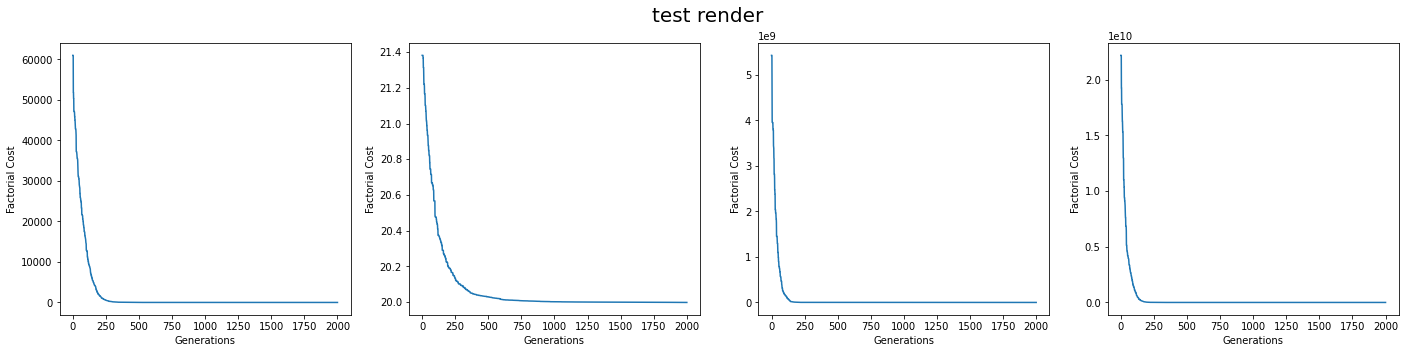

In [9]:
fig = model.render((1, 4), title= "test render")